# Chapter 05 확률

- <a href="#5.1시행과사건">5.1 시행과사건</a>
- <a href="#5.2확률">5.2 확률</a>
- <a href="#5.3조건부 확률">5.3 조건부 확률</a>
- <a href="#5.4베이즈정리">5.4 베이즈정리</a>

## <a name="5.1시행과사건">5-1 시행과 사건</a>

### 시행 (trial)

동일한 조건 아래서 반복할 수 있으며, 그 결과가 우연에 의해 달라질 수 있는 실험 또는 관찰

### [실습] 예제 5-1: 주사위를 두 번 반복하여 던지는 시행
주사위를 두 번 반복하여 던지는 시행에서 나타날 수 있는 모든 경우 나타내기

In [35]:
# 주사위에서 나올 수 있는 경우의 수
# 방법1
D = list(range(1,7))  # [1,2,3,4,5,6]
print('-'*50)
for i in D :
    for j in D:   
        print(f'({i},{j})', end=' ')
    print()

--------------------------------------------------
(1,1) (1,2) (1,3) (1,4) (1,5) (1,6) 
(2,1) (2,2) (2,3) (2,4) (2,5) (2,6) 
(3,1) (3,2) (3,3) (3,4) (3,5) (3,6) 
(4,1) (4,2) (4,3) (4,4) (4,5) (4,6) 
(5,1) (5,2) (5,3) (5,4) (5,5) (5,6) 
(6,1) (6,2) (6,3) (6,4) (6,5) (6,6) 


#### #파이썬 itertools 라이브러리
https://docs.python.org/ko/3/library/itertools.html

- 중복(O) + 순서(O) : product( )
- 중복(O) + 순서(x) : combination_with_replacement()
- 중복(x) + 순서(O) : permutations()
- 중복(x) + 순서(x) : combinations()

In [36]:
# 방법2
import itertools

D = list(range(1,7))
outcomes = list( itertools.product(D, repeat=2) ) 

for idx, d in enumerate(outcomes):
    if idx%6==0: print()
    print(d, end = ' ')


(1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) 
(2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) 
(3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) 
(4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) 
(5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (5, 6) 
(6, 1) (6, 2) (6, 3) (6, 4) (6, 5) (6, 6) 

### [실습] 예제 5-2: 복원추출, 비복원추출

In [44]:
import itertools

S = ['w1','w2','b1','b2']

outcomes = list(itertools.combinations_with_replacement(S, r=2) ) # 복원추출 시행
results = [ (x1, x2) for  x1, x2 in outcomes if x1 == 'w1' ] # 경우의 수 순서쌍
stones = [ x2 for x1, x2 in results ] # 두번째 바둑돌 경우의 수
print(f'복원추출 경우의 수 쌍 : {results}')
print(f'두번째 바둑돌 경우의 수  : {stones}')  

print('-'*50)
outcomes = list(itertools.combinations(S, r=2))  # 비복원추출
results = [ (x1, x2) for  x1, x2 in outcomes if x1 == 'w1' ] # 경우의 수 순서쌍
stones = [ x2 for x1, x2 in results ] # 두번째 바둑돌 경우의 수 
print(f'비복원추출 경우의 수 쌍: {results}')
print(f'두번째 바둑돌 경우의 수  : {stones}')  

복원추출 경우의 수 쌍 : [('w1', 'w1'), ('w1', 'w2'), ('w1', 'b1'), ('w1', 'b2')]
두번째 바둑돌 경우의 수  : ['w1', 'w2', 'b1', 'b2']
--------------------------------------------------
비복원추출 경우의 수 쌍: [('w1', 'w2'), ('w1', 'b1'), ('w1', 'b2')]
두번째 바둑돌 경우의 수  : ['w2', 'b1', 'b2']


--------

### 사건 (event)

- **표본(sample)** : 풀고자 하는 확률적 문제에서 발생(Realize)할 수 있는 하나의 현상 또는 선택(Sampled)될 수 있는 하나의 경우
- **표본공간(sample space)** : 어떤 시행 결과로 기록되거나 관찰될 수 있는 모든 결과들의 집합
- **표본점(sample point)** : 시행에서 나타날 수 있는 개개의 결과, element
- **사건**: 표본공간의 부분집합

#### 동전 반복해서 두 번 던지는 모든 사건 

In [49]:
from itertools import product, chain, combinations

# 표본공간 
def get_samplespace(t, r):    
    S = list(product(t, repeat=r))  # itertools.product(a,a,a)
    S = [''.join(s) for s in S]   #  ('H,'H')-->'HH'로 표현
    return S

    
# 동전 던지기
t = ['H', 'T'] # coin
r = 2          # repeat
S = get_samplespace(t, r)
print(f'동전 {r}번 던지는 표본공간(S): {set(S)}')

동전 2번 던지는 표본공간(S): {'TH', 'HT', 'TT', 'HH'}


### [실습] 예제 5-3: 동전 세 번 던지는 사건
- 표본공간(Ω, S) : 전체 사건 
- 사건(A): 적어도 앞면이 2번 이상 나오는 사건 

In [73]:
import itertools

# 표본공간 
def get_samplespace(t, r):    
    S = list(product(t, repeat=r))  # itertools.product(a,a,a)
    S = [''.join(s) for s in S]   #  ('H,'H')-->'HH'로 표현
    return S
   
    
# 동전 던지기
t = ['H', 'T'] # coin
r = 3          # repeat
S = get_samplespace(t, r)
print(f'동전 {r}번 던지는 표본공간(S): {S}')

#  적어도 두번 앞면이 나오는 사건
samples = [ a.count('H') for a in S]
A = [ S[idx] for idx, a in enumerate(samples) if a > 1 ]
print(f'적어도 두번 앞면이 나오는 사건: {A}')

동전 3번 던지는 표본공간(S): ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
적어도 두번 앞면이 나오는 사건: ['HHH', 'HHT', 'HTH', 'THH']


### 사건의 연산
- 집합의 성질을 이용하여 사건을 연산한다.

### [실습] 예제 5-4: 사건의 연산
1. $A ∩ B$
2. $A ∪ B$
3. $𝐴^𝑐$  
4. $B - C$
5. 배반인 두 사건   

In [67]:
#주사위를 던지는 실험
S = {1,2,3,4,5,6}  #표본공간=전체집합
A = {1,2,3,4}
B = {4,5}
C = {5,6}

#  A ∩ B: (곱사건 : 교집합)
print(f'곱사건(A ∩ B): {A & B}')  #print(A.intersection(B)) 

# A ∪ B (합사건 : 합집합)
print(f'합사건(A ∪ B): {A | B}') #print(A.union(B))

# A^𝑐 (여사건 : 여집합)
print(f'여사건(𝐴𝑐): {S - A}')    #print(S.difference(A))

# B - C (차사건 : 차집합)
print(f'차사건(B-C): {B - C}')  #print(B.difference(C))

# A ∩ C = ∅ (배반인 두 사건 : 공집합)
print(f'배반인 두 사건(A ∩ C = ∅): {A & C} ')

곱사건(A ∩ B): {4}
합사건(A ∪ B): {1, 2, 3, 4, 5}
여사건(𝐴𝑐): {5, 6}
차사건(B-C): {4}
배반인 두 사건(A ∩ C = ∅): set() 


### [실습] 분배법칙이 성립하는지 파이썬 코드로 증명
다음 세 집합 A, B, C에 대해서 분배법칙이 성립하는지 파이썬 코드로 증명하기
- $A∪(B∩C)$ 
- $A∩(B∪C)$

In [68]:
A = {1,3,5}
B = {1,2,3}
C = {2,4,6}

print( A|(B&C) == (A|B)&(A|C) )
print( A&(B|C) == (A&B)|(A&C) )

True
True


### [실습] 예제 5-5:  사건의 연산
- a. $A ∩ B ∩ C$ 
- b. $(A∪B)∩ C$
- c. $(A ∩ C)^𝑐$
- d. $(A∪B)^𝑐$

In [69]:
#주사위를 던지는 실험
S = {1,2,3,4,5,6}  #표본공간=전체집합
A = {1,3,4}
B = {4,5}
C = {3,4,6}

#(a). A ∩ B ∩ C
print(f'a. A ∩ B ∩ C: {A & B & C}')

#(b). (A∪B)∩ C
print(f'b. (A∪B)∩ C:  {(A|B) & C}')

#(c). (A ∩ C)^𝑐
print(f'c. (A ∩ C)^𝑐: {S - (A&C)}')
print(f'c. (A ∩ C)^𝑐: {(S-A) | (S-C)}')

#(d). (A∪B)^𝑐
print(f'd. (A∪B)^𝑐: {S - (A|B)}')
print(f'd. (A∪B)^𝑐: {(S-A) & (S-B)}')

a. A ∩ B ∩ C: {4}
b. (A∪B)∩ C:  {3, 4}
c. (A ∩ C)^𝑐: {1, 2, 5, 6}
c. (A ∩ C)^𝑐: {1, 2, 5, 6}
d. (A∪B)^𝑐: {2, 6}
d. (A∪B)^𝑐: {2, 6}


--------

## <a name="5.2확률">5.2 확률</a>
- **확률(Probability)이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수**이다.
- 즉, 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수가 확률이다.

### 수학적 확률
일반적으로 1회의 시행에서 일어날 수 있는 경우의 수가 N 인 표본공간에서  각 근원사건이 발생할  가능성이 같을 경우, 사건 A 가 일어나는 경우의 수를 n 이라고 하면 A 의 확률은 다음과 같이 정의할 수 있다!<br>
$P(A) = $ $n(A) \over  n(S)$

### [실습] 예제 5-6: 주사위 던지는 사건
주사위를 반복해서 세 번 던져서 적어도 두번 앞면에 나오는 확률

In [75]:
import itertools

# 표본공간 
def get_samplespace(t, r):    
    S = list(product(t, repeat=r))  # itertools.product(a,a,a)
    S = [''.join(s) for s in S]   #  ('H,'H')-->'HH'로 표현
    return S
   
    
# 동전 던지기
t = ['H', 'T'] # coin
r = 3          # repeat
S = get_samplespace(t, r)
print(f'동전 {r}번 던지는 표본공간(S): {S}')

#  적어도 두번 앞면이 나오는 사건
samples = [ a.count('H') for a in S]
A = [ S[idx] for idx, a in enumerate(samples) if a > 1 ]
print(f'적어도 두번 앞면이 나오는 사건: {A}')

# 확률
print('-'*30)
print(f'적어도 두번 앞면이 나오는 확률 P(A)=n(A)/n(S) : {len(A)/len(S)}')

동전 3번 던지는 표본공간(S): ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
적어도 두번 앞면이 나오는 사건: ['HHH', 'HHT', 'HTH', 'THH']
------------------------------
적어도 두번 앞면이 나오는 확률 P(A)=n(A)/n(S) : 0.5


### 통계적 확률

#### 시행회수 증가에 따른 확률의 변화 
동전 던지는 시행 횟수가 많아질수로 앞면에 나오는 확률은 0.5에 가까워진다.

In [80]:
import random
import math

ns = [50,100,500,1000,2000,2500,5000,10000] # 시행횟수
rs = []   # 앞면의 수
ps = []   # 앞면의 삼대도수(확률)

for n in ns:
    tmp= []
    for i in range(n):
        tmp.append( random.choice(['H','T']) ) # 동전의 앞, 뒤 임의 선택
    r = tmp.count('H')  # 앞면의 수
    rs.append(r)              # 앞면의 수를 rs 리스트에 추가
    ps.append(round(r/n,3))  # P(앞면): 앞면이 나올 확률을 ps 리스트에 추가


# pandas 테이블 형태로 보여주기    
import pandas as pd
dics = dict()
for idx, n in enumerate(ns):
    key = ns[idx]
    values = [rs[idx], ps[idx]]
    dics[key] = values

df = pd.DataFrame(dics, columns=ns, index=['앞면의수','앞면의 상대도수'])
df

,50,100,500,1000,2000,2500,5000,10000
앞면의수,18.00,54.00,245.00,491.000,998.000,1254.000,2504.000,5043.000
앞면의 상대도수,0.36,0.54,0.49,0.491,0.499,0.502,0.501,0.504


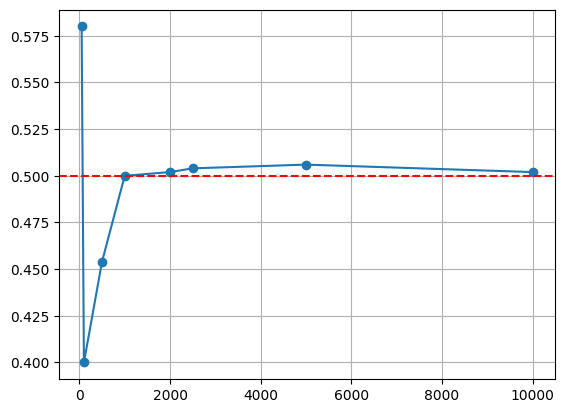

In [79]:
import matplotlib.pyplot as plt
    
x = ns  # 시행횟수
y = ps  # 확률

plt.plot(x, y, 'o', linestyle='solid' )
plt.axhline(0.5, c='r', ls='--')           # 모평균
plt.grid()
plt.show()

### 확률의 성질

### [실습] 예제 5-8:  배반사건 확률구하기
남자 10명과 여자 5명으로 구성된 모임에서 회장과 총무를 임의로 뽑고자 한다. 이때 회장과 총무가 모두 남자이거나 여자일 확률은? <br>
$P(A U B) = P(A) + P(B)$

In [110]:
import itertools

# 전체 표본공간
M = [f"m{i}" for i in range(1, 11)]  # 남자 10명
W = [f"w{i}" for i in range(1, 6)]   # 여자 5명
data = M + W


# 전체에서 2명 선택
r = 2     # 선택    
S = list(itertools.combinations(data, r)) # 반복(x) 순서(X)
print(f'전체 집합 수 n(S): {len(S)}')  
# print(f'전체 집합 S: {S}')


# 확률구하기
A = [(x1, x2) for x1, x2 in S if (x1 in M and x2 in M) ] # 모두 남자인 사건
B = [(x1, x2) for x1, x2 in S if (x1 in W and x2 in W) ] # 모두 여자인 사건
print(f'사건 A(회장,총무 모두 남자)의 확률: {len(A)/len(S)}')
print(f'사건 B(회장,총무 모두 여자)의 확률: {len(B)/len(S)}')
print((f'P(A U B) = P(A) + P(B): {len(A)/len(S) + len(B)/len(S)}'))

전체 집합 수 n(S): 105
사건 A(회장,총무 모두 남자)의 확률: 0.42857142857142855
사건 B(회장,총무 모두 여자)의 확률: 0.09523809523809523
P(A U B) = P(A) + P(B): 0.5238095238095237


### [실습] 예제 5-9
10개의 배터리 중에 불량품이 3개 들어있다. 이 중에서 동시에 4개를 꺼낼 때, 불량품이 적어도 하나 포함될 확률은

In [112]:
import itertools

# 전체 표본공간
normal = [f"n{i}" for i in range(1, 8)]  # 정상 7
bad    = [f"b{i}" for i in range(1, 4)]  # 불량 3
data = normal + bad
   

# 전체에서 4개를 선택하는 경우의 수
r = 4     # 선택 
S = list(itertools.combinations(data, r))  # 반복(x) 순서(X)
print(f'전체 집합 수 n(S): {len(S)}') 
# print(f'전체 집합 S: {S}')


# 정상 배터리만 꺼내는 경우의 수
Ac = list(itertools.combinations(normal, r))  

# 확률 구하기
print(f'Ac 확률: {len(Ac)/len(S)}')
print(f'A  확률: {1 - len(Ac)/len(S)}')
    

전체 집합 수 n(S): 210
Ac 확률: 0.16666666666666666
A  확률: 0.8333333333333334


### [실습] 예제 5-10
어느 학생이 통계학과 영어에서 A학점을 받을 확률이 각각 70%와 65%이고 통계학과 또는 영어에서 A학점을 받을 확률이 86%일 때 다음을 구하라.<br>
- 두 과목 모두 A를 받을 확률
- 통계학에서만 A를 받을 확률

In [126]:
P_A = 70/100
P_B = 65/100
P_AB =  86/100            # P(A∪B)
P_AB_ = P_A + P_B - P_AB  # P(A∩B )
print(f"P(A∩B) = P(A) + P(B) - P(A∪B ): {P_AB_}") 
print(f"P(A - B)= P(A) - P(A∩B):  {P_A - P_AB_}") 

P(A∩B) = P(A) + P(B) - P(A∪B ): 0.4900000000000001
P(A - B)= P(A) - P(A∩B):  0.20999999999999985


### [실습] 확률구하기
주사위 2개를 던져서 나오는 눈의 수를 순서쌍(x1, x2)로 나타낼 때 임의의 두 사건 A와 B가 다음을 만족한다. 주어진 확률을 구하라.<br>
$A = \{ (x_{1},x_{2}) | x_{1}+x_{2}=10 \} $, $B = \{ (x_{1},x_{2}) | x_{1}>x_{2} \}$

In [130]:
import itertools

D = list(range(1,7))
S = list( itertools.product(D, repeat=2) ) 

A = [(x1, x2) for x1, x2 in S if x1 + x2 == 10]
B = [(x1, x2) for x1, x2 in S if x1 > x2 ]
AB_=[(x1, x2) for x1, x2 in S if (x1 + x2 == 10) and (x1 > x2) ] #  A∩B
P_A = len(A)/len(S)     # P(A)
P_B = len(B)/len(S)     # P(B)
P_AB_= len(AB_)/len(S)  # P(A∩B)
P_AB = P_A +P_B - P_AB_   # P(A) + P(B) - P(A∩B)
print(f"P(A): {P_A}")
print(f"P(B): {P_B}")
print(f"P(A∩B): {P_AB_}")
print(f"P(A∪B): {P_AB}")
print(f"P(Ac): {1 - P_A}")

P(A): 0.08333333333333333
P(B): 0.4166666666666667
P(A∩B): 0.027777777777777776
P(A∪B): 0.4722222222222222
P(Ac): 0.9166666666666666


In [122]:
11/12

0.9166666666666666

------------------------------------

## <a name="5.3조건부 확률">5.3 조건부 확률</a>

### 조건부 확률
$P(B|A) = $ $P(A∩B) \over P(A) $, $P(A) > 0$

### [실습] 5-11: 조건부 확률
주사위를 두 번 던지는 게임에서 처음에 3의 배수가 나왔다는 조건 아래서 두번째도 3의 배수가 나올 확률 구하기

In [134]:
import itertools

D = list(range(1,7))
S = list( itertools.product(D, repeat=2) ) 
A = [(x1,x2) for x1, x2 in S if x1%3==0 ] # A
B = [(x1,x2) for x1, x2 in S if x2%3==0 ] # B
AB_ = [(x1,x2) for x1, x2 in S if (x1%3==0) and (x2%3==0)] # A∩B

P_A = len(A)/len(S)      # P(A)
P_B = len(B)/len(S)      # P(B)
P_AB_ = len(AB_)/len(S)  # P(A∩B)
P_B_A = P_AB_/ P_A    # P(A∩B) / P(A) --> 조건부확률, A조건하에서 B가 나올 확률

print(f"A: {A}")
print(f"B: {B}")
print(f"A∩B: {AB_}")
print('-'*50)
print(f"P(A): {P_A}")
print(f"P(B): {P_B}")
print(f"P(A∩B): {P_AB_}")
print(f"P(B|A): {P_B_A}")

A: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
B: [(1, 3), (1, 6), (2, 3), (2, 6), (3, 3), (3, 6), (4, 3), (4, 6), (5, 3), (5, 6), (6, 3), (6, 6)]
A∩B: [(3, 3), (3, 6), (6, 3), (6, 6)]
--------------------------------------------------
P(A): 0.3333333333333333
P(B): 0.3333333333333333
P(A∩B): 0.1111111111111111
P(B|A): 0.3333333333333333


### [실습] 조건부 확률 
기상청에서 오늘 비가 올 확률은 60%, 내일 비가 올 확률은 50%, 오늘과 내일 이틀 동안 비가 올 확률은 40%라고 발표하였다. 오늘 비가 왔을 때 내일 비가 올 확률을 구하라.

In [138]:
P_A = 0.6
P_B = 0.5
P_AB_ = 0.4
P_B_A = P_AB_ / P_A    # P(B|A)
P_B_A

0.6666666666666667

### 곱의 법칙
$P(A∩B) = $ $P(A) * P(B|A) $, $P(A)>0,P(B)>0$ <br>
$P(A∩B) = $ $P(B) * P(A|B) $

### [실습] 조건부 확률 - 곱셈 법칙
주머니 안에 같은 크기의 흰 구슬 7개와 검은 구슬 3개가 들어 있다. 주머니 안에서 2개의 구슬을 1개씩 차례로 꺼낼 때, 처음에 흰 구슬이 나오고 나중에 검은 구슬이 나올 확률을 구하라. (단, 꺼낸 구슬은 다시 주머니에 넣지 않는다.)

In [139]:
# 필요한 변수 설정
num_white = 7
num_black = 3
total_balls = num_white + num_black

# 처음에 흰 구슬이 나오고 나중에 검은 구슬이 나올 확률 구하기
prob_white_first_black_second = (num_white / total_balls) * (num_black / (total_balls - 1))

print("처음에 흰 구슬이 나오고 나중에 검은 구슬이 나올 확률:", prob_white_first_black_second)

처음에 흰 구슬이 나오고 나중에 검은 구슬이 나올 확률: 0.2333333333333333


### 독립과 종속
$P(B|A) = P(B), P(A|B) = P(A) $, (두 사건 A, B가 독립이면)

### [실습] 조건부 확률 - 독립성
환자에게 신약을 투약할 때, 부작용을 일으킬 확률이 0.15이고 환자들의 부작용 여부는 독립이다. 이 신약을 환자 3명에게 투약할 때, 다음 확률을 구하라.<br
- 3명 모두 부작용을 일으킬 확률
- 적어도 1명이 부작용을 일으킬 확률


In [140]:
'''이 문제는 이항분포를 따르는 문제이므로, 
파이썬의 SciPy 라이브러리의 이항분포 함수인 binom.pmf()를 사용하여 구할 수 있다.
'''
from scipy.stats import binom

p = 0.15
n = 3
prob = binom.pmf(n, n, p)

print(f"3명 모두 부작용을 일으킬 확률: {prob:.4f}")

prob = binom.pmf(n, n, 1-p)  # 3명 모두 부작용을 일으키지 않을 확률
print(f"적어도 한 명이 부작용을 일으킬 확률: {1-prob:.4f}")

3명 모두 부작용을 일으킬 확률: 0.0034
적어도 한 명이 부작용을 일으킬 확률: 0.3859


---------------------------------------

## <a name="5.4베이즈정리">5.4 베이즈정리</a>

### 베이즈 정리
- 일어난 일을 토대로 일어나지 않은 일에 대한 확률을 구할 때 사용
- ① 표본공간의 분할 개념을 통해 전확률(total probability)과(사건이 서로 배반이고 모두의 합사건이 표본공간 전체일 때)
- ② 임의의 사건 A에 대한 사건 B의 조건부 확률(conditional probability) P(B|A)로 부터 정의될 수 있다

- **전확률(total probability)** 
$P(B) = $ $\sum_{i=1}^n P(A_i)P(B|A_i)$
- **베이즈 정리** <br>
$P(A_i|B) = $ $P(A_i)P(B|A_i) \over \sum_{j=1}^n P(A_j)P(B|A_j) $

In [ ]:
def bayes_theorem(A, B, P_A, P_B_given_A, P_B):
    # P(A|B) = P(B|A) * P(A) / P(B)
    P_A_given_B = P_B_given_A * P_A / P_B
    return P_A_given_B

P_A = 0.3
P_B_given_A = 0.6
P_B = 0.4
P_A_given_B = bayes_theorem('A', 'B', P_A, P_B_given_A, P_B)
print(P_A_given_B)

----------------------------------

In [ ]:
THE END